# Navigation

---

### 1. Starting the Environment

Start creating the environment by creating an isloated python environment (this should be done with python 3):
* ``sudo -H pip3 install --upgrade pip``
* ``sudo -H pip3 install virtualenv``
* ``virtualenv drl_project``
* ``source drl_project/bin/activate``

#### Install Jupyter
* ``pip install jupyter``
* ``jupyter notebook``

---
Next install the required libraries:

In [1]:
!pip -q install ./python

---
Next start the environment. Based on your operating system, there are different version you will need to download and execute:
* Linux: https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip
* Mac OSX: https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip
* Windows (64-bit): https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip

---
Also make sure to try out to make sure the environment works. You might need to update a few admin permission along the way based on your system security settings.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

Run the following code to take some actions.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [6]:
# env.close()

---
### 4. Implementing the DQN algorithm.

In [7]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [8]:
from dqn_agent import Agent

In [9]:
# Deep Q-Learning function
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpoint_file='checkpoint.pth'):

    """
    :param n_episodes: The total number of espidoes to run for the algorithm.
    :type n_episodes: int
    
    :param max_t: The number of steps to run per episode.
    :type max_t: int
    
    :param eps_start: The starting epsilon value.
    :type eps_start: float
    
    :param eps_end: The minimum epsilon value after multiple decays.
    :type eps_end: float
    
    :param eps_decay: The factor for decreasing the epsilon value per episode.
    :type eps_decay: float
        
    """
    scores = []                        # list containing scores from each episode
    averages = []                      # list containing the averages from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        
        score = 0                                          # initialize the score

        for t in range(max_t):
            action = agent.act(state, eps)                      # select an action
            env_info = env.step(action)[brain_name]             # send the action to the environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            score += reward                                     # update the score
            state = next_state                                  # roll over the state to next time step
            if done:                                            # exit loop if episode finished
                break

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        average = np.mean(scores_window)  # calculate the average
        averages.append(average)
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average))
        if average >= 15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, average))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_file)
            break

    return scores, averages

---
### 5. Running the algorithm.

In [10]:
env_info = env.reset(train_mode=True)[brain_name]

action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

---
The first trial will just involve the default 2000 episodes with 1000 steps per episodes. This solved the environment in 513 episodes.

In [41]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, averages = dqn(checkpoint_file='checkpoints/2000_1000_001.pth')

Episode 100	Average Score: 0.68
Episode 200	Average Score: 4.71
Episode 300	Average Score: 8.13
Episode 400	Average Score: 11.79
Episode 500	Average Score: 12.97
Episode 600	Average Score: 14.32
Episode 700	Average Score: 14.52
Episode 771	Average Score: 15.03
Environment solved in 671 episodes!	Average Score: 15.03


---
The next trial was to increase the minimum epsilon value. As expected, this did not have much of an effect.

In [42]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, averages = dqn(eps_end=0.1, checkpoint_file='checkpoints/2000_1000_01.pth')

Episode 100	Average Score: 1.25
Episode 200	Average Score: 4.58
Episode 300	Average Score: 8.79
Episode 400	Average Score: 10.19
Episode 500	Average Score: 13.07
Episode 600	Average Score: 14.24
Episode 700	Average Score: 14.60
Episode 800	Average Score: 13.66
Episode 900	Average Score: 13.75
Episode 1000	Average Score: 13.74
Episode 1100	Average Score: 14.00
Episode 1200	Average Score: 14.01
Episode 1300	Average Score: 13.48
Episode 1400	Average Score: 12.51
Episode 1500	Average Score: 13.15
Episode 1600	Average Score: 12.16
Episode 1700	Average Score: 13.06
Episode 1800	Average Score: 13.26
Episode 1900	Average Score: 13.06
Episode 2000	Average Score: 13.72


---
The next trial was to make the algorithm more greedy, by reducing the minum epsilon to 0 and decreasing the decay to 0.95. This performed much better and solved the environment in 294 episodes.

In [43]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, averages = dqn(eps_end=0.0, eps_decay=0.95, checkpoint_file='checkpoints/2000_1000_0_095.pth')


Episode 100	Average Score: 4.09
Episode 200	Average Score: 6.00
Episode 300	Average Score: 11.05
Episode 400	Average Score: 12.68
Episode 468	Average Score: 15.07
Environment solved in 368 episodes!	Average Score: 15.07


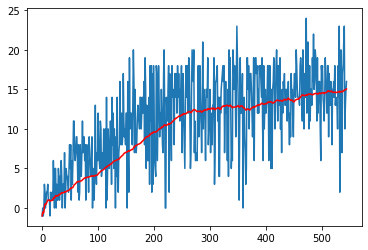

In [12]:
fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), averages, c='r')
plt.show()

### 6. Best performing agent

---
The best performing agent ran in 261 episodes, with epsilon decay set to 0.95.

In [11]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, averages = dqn(eps_decay=0.98, checkpoint_file='checkpoints/2000_1000_001_095.pth')

Episode 100	Average Score: 1.09
Episode 200	Average Score: 6.10
Episode 300	Average Score: 10.02
Episode 400	Average Score: 11.83
Episode 500	Average Score: 14.16
Episode 600	Average Score: 14.82
Episode 625	Average Score: 15.08
Environment solved in 525 episodes!	Average Score: 15.08


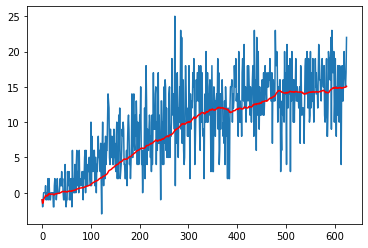

In [12]:
fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), averages, c='r')
plt.show()

#### Testing the agent.

In [13]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoints/2000_1000_001_095.pth'))

n_episodes = 10
scores = []

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

Episode 1	Average Score: 10.00
Episode 2	Average Score: 12.00
Episode 3	Average Score: 15.00
Episode 4	Average Score: 14.50
Episode 5	Average Score: 15.40
Episode 6	Average Score: 15.83
Episode 7	Average Score: 16.00
Episode 8	Average Score: 15.00
Episode 9	Average Score: 15.78
Episode 10	Average Score: 15.90


In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.show()

### 7. Double DQN Implementation

In [11]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double_dqn=True)
scores, averages = dqn(eps_decay=0.95, checkpoint_file='checkpoints/2000_1000_001_095_double_dqn.pth')

Episode 100	Average Score: 1.91
Episode 200	Average Score: 5.61
Episode 300	Average Score: 10.01
Episode 400	Average Score: 12.53
Episode 475	Average Score: 15.00
Environment solved in 375 episodes!	Average Score: 15.00


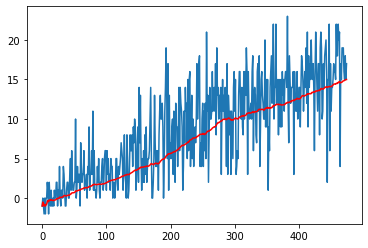

In [12]:
fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), averages, c='r')
plt.show()

#### Testing the agent.

In [15]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoints/2000_1000_001_095_double_dqn.pth'))

n_episodes = 10
scores = []

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

Episode 1	Average Score: 11.00
Episode 2	Average Score: 6.50
Episode 3	Average Score: 7.67
Episode 4	Average Score: 10.75
Episode 5	Average Score: 12.40
Episode 6	Average Score: 13.33
Episode 7	Average Score: 12.00
Episode 8	Average Score: 11.12
Episode 9	Average Score: 10.22
Episode 10	Average Score: 11.20
